# Duncan Conly ID : 010958878 
# Intro To Machine Learning Homework 2

# Part A : Binary Classification

Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from IPython.display import display
from tabulate import tabulate

In [2]:
file_path = "Data/wine.csv"

df = pd.read_csv(file_path)

display(df.head(5))
print('*********************************')

# Run this only once or it will recategorize again
df["quality"] = df["quality"].apply(lambda x: 0 if x <= 5 else 1)
# display(df.info())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


*********************************


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


C:\Users\dtcon\AppData\Local\Temp\ipykernel_10496\3213641528.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="quality", data = df, ax=axes[0], palette="coolwarm")


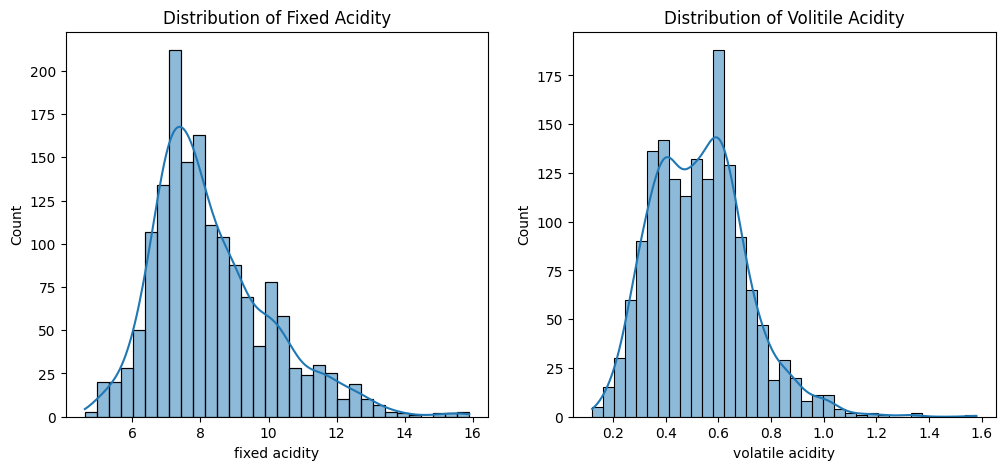

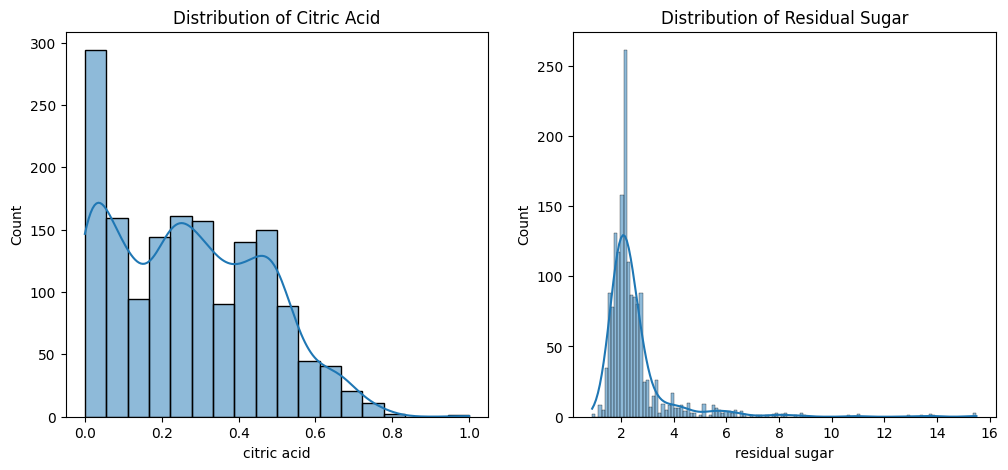

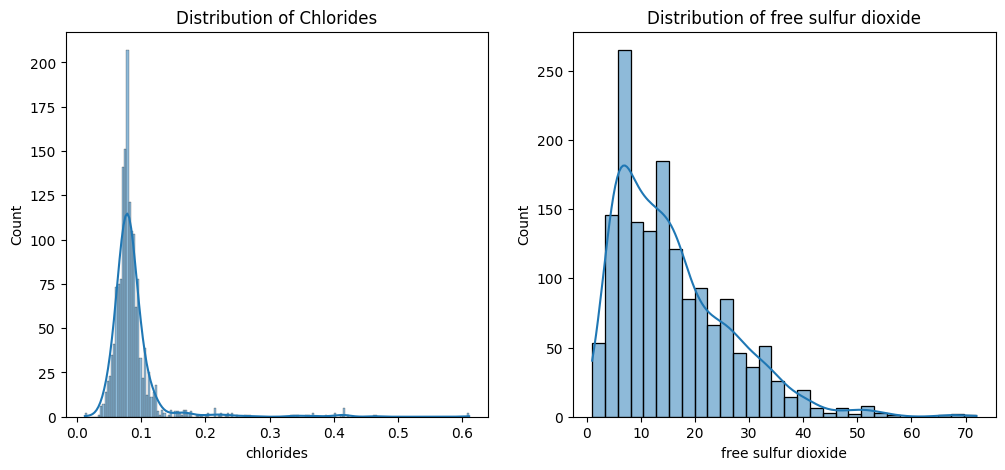

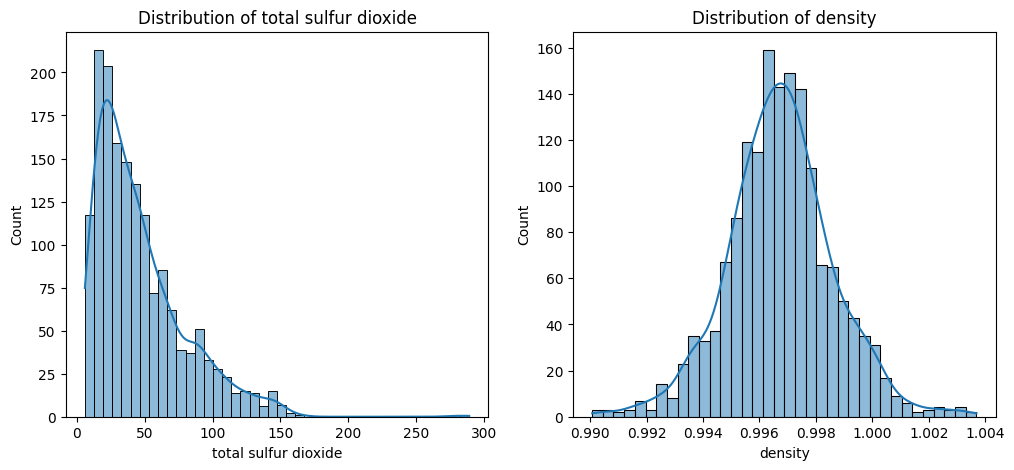

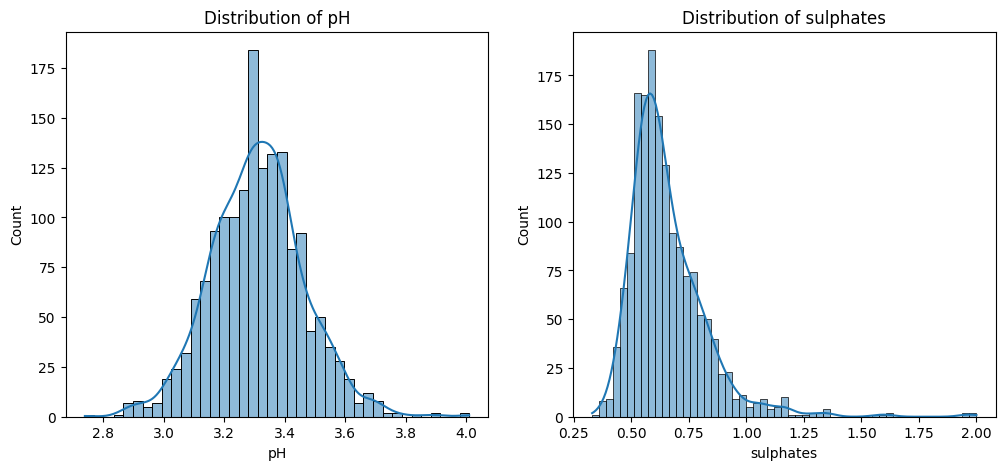

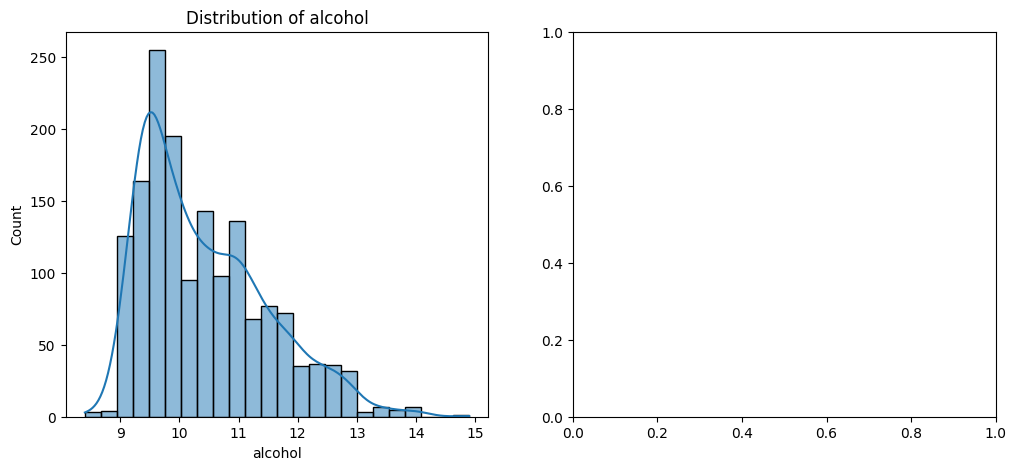

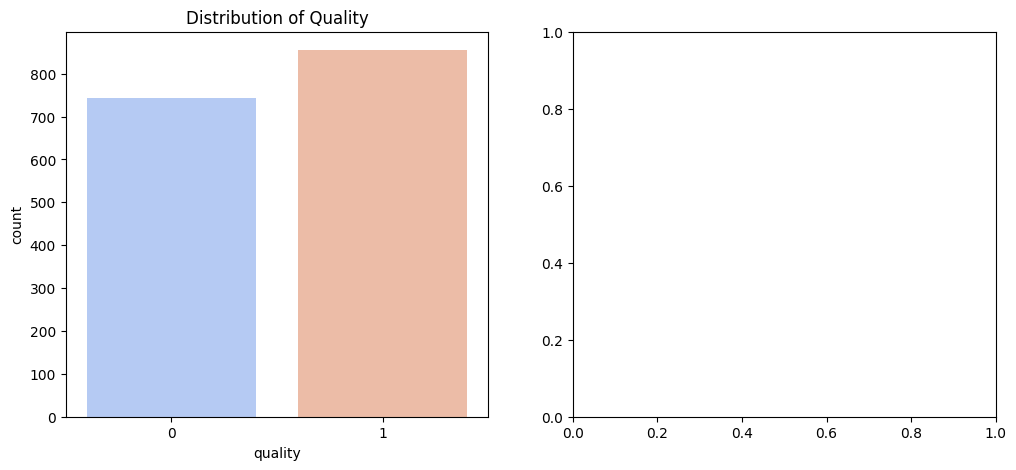

Text(0.5, 1.0, 'Correlation Matrix')

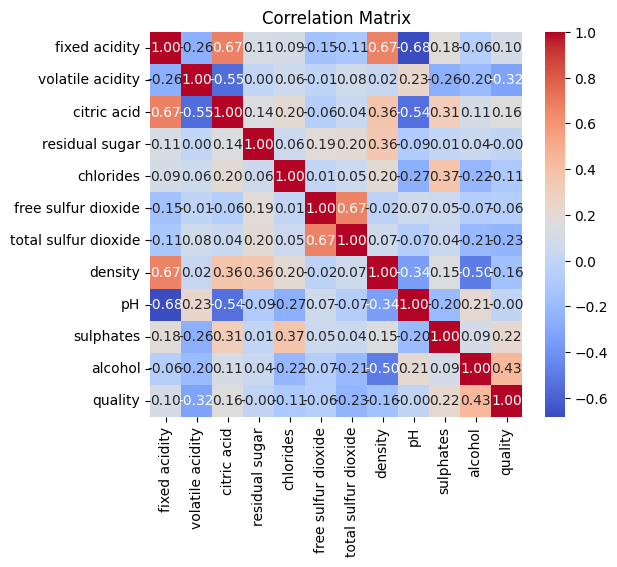

In [3]:
# Check for missing values

missing_values = df.isnull().sum()

# Recatigorize the variables from quality column into 0 if it is 3-5 and 1 if it is 6-8



# now that all of the quality rows are replaced with either zeros or ones, can move on to bigger and better things

# display(df.head(25))
summary_stats = df.describe()
# onvet the 
summary_stats = df.describe

display(df.head(25))

# Countplot for numerical variables

fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.histplot(df["fixed acidity"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Fixed Acidity")

sns.histplot(df["volatile acidity"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Volitile Acidity")


fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["citric acid"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Citric Acid")

sns.histplot(df["residual sugar"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of Residual Sugar")

fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["chlorides"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of Chlorides")

sns.histplot(df["free sulfur dioxide"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of free sulfur dioxide")

fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["total sulfur dioxide"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of total sulfur dioxide")

sns.histplot(df["density"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of density")

fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["pH"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of pH")

sns.histplot(df["sulphates"], kde=True, ax=axes[1])
axes[1].set_title("Distribution of sulphates")

fig, axes = plt.subplots(1,2,figsize=(12,5))
sns.histplot(df["alcohol"], kde=True, ax=axes[0])
axes[0].set_title("Distribution of alcohol")

fig, axes = plt.subplots(1,2, figsize=(12,5))

sns.countplot(x="quality", data = df, ax=axes[0], palette="coolwarm")
axes[0].set_title("Distribution of Quality")


plt.show()
# Recatigorize the variables into diffferent 

plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")



# Binary Classification

In [4]:
# Assign numeric values to categorical variables and split data

X = df.drop(columns=["quality"])
y = df["quality"]

le_acidity = LabelEncoder()
df["fixed acidity"] = le_acidity.fit_transform(df["fixed acidity"])

# Split dataset into training and testing sets (80% train, 20% test)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42, stratify=y)

#Confirm the shapes of the splits
print('The shape of train and test X, and train and test y are :')
X_train.shape, X_test.shape, y_train.shape, y_test.shape


# # Compute correlation matrix
# corr_matrix = pd.DataFrame(X_train).corr().abs()

# # Find columns with high correlation (e.g., above 0.95)
# high_corr_features = [column for column in corr_matrix.columns if any(corr_matrix[column] > 0.95)]

# # Drop one of each highly correlated feature
# X_train = pd.DataFrame(X_train).drop(columns=high_corr_features)
# X_test = pd.DataFrame(X_test).drop(columns=high_corr_features)


The shape of train and test X, and train and test y are :


((1279, 11), (320, 11), (1279,), (320,))

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report

# Initializing the models

log_reg = LogisticRegression(max_iter = 100000)
lda = LDA()
qda = QDA()
nb = GaussianNB()

# Fit models on training data
log_reg.fit(X_train, y_train)
lda.fit(X_train, y_train)
qda.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Make predictions on test data
y_pred_log_reg = log_reg.predict(X_test)
y_pred_lda = lda.predict(X_test)
y_pred_qda = qda.predict(X_test)
y_pred_nb = nb.predict(X_test)

# Compute evaluation metrics
models = {
    "Logistic Regression": y_pred_log_reg,
    "LDA": y_pred_lda,
    "QDA": y_pred_qda,
    "Naïve Bayes": y_pred_nb
}

# Making a dataframe to store results

results = []
for model_name, y_pred in models.items():
    results.append({
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred)
    })

C:\Users\dtcon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
C:\Users\dtcon\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [6]:
# We can display our result for all models as table using tabulate library
from tabulate import tabulate
print(tabulate(results, headers='keys', tablefmt='pretty'))

+---------------------+----------+--------------------+--------------------+--------------------+
|        Model        | Accuracy |      F1 Score      |     Precision      |       Recall       |
+---------------------+----------+--------------------+--------------------+--------------------+
| Logistic Regression | 0.753125 | 0.7627627627627628 | 0.7839506172839507 | 0.7426900584795322 |
|         LDA         | 0.75625  | 0.7621951219512195 | 0.7961783439490446 | 0.7309941520467836 |
|         QDA         | 0.709375 | 0.7365439093484419 | 0.7142857142857143 | 0.7602339181286549 |
|     Naïve Bayes     |  0.725   |       0.725        | 0.7785234899328859 | 0.6783625730994152 |
+---------------------+----------+--------------------+--------------------+--------------------+


In [7]:
from sklearn.metrics import ConfusionMatrixDisplay

# Function to plot confusion matrix
def display_confusion_matrix(y_true, y_pred, model_name, dataset_type):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low Quality", "High Quality"])
    disp.plot(cmap="coolwarm")
    plt.title(f"Confusion Matrix - {model_name} ({dataset_type})")
    plt.show()

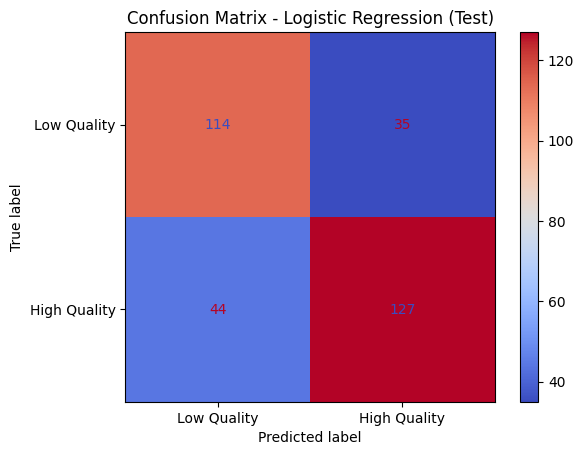

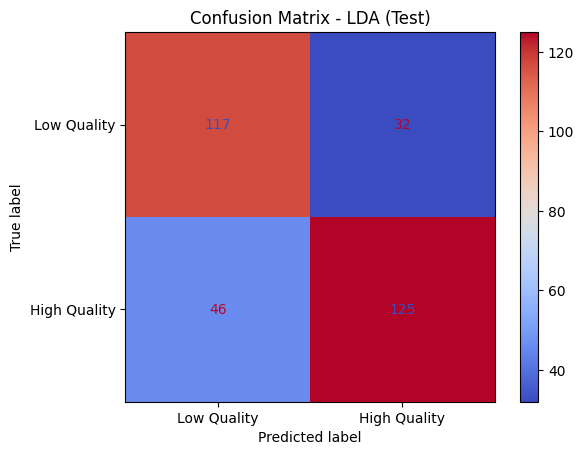

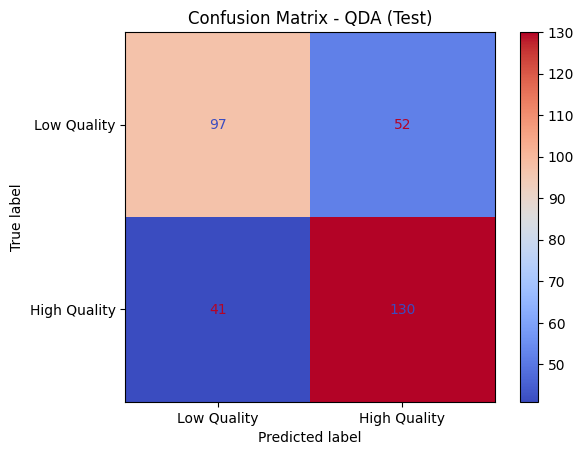

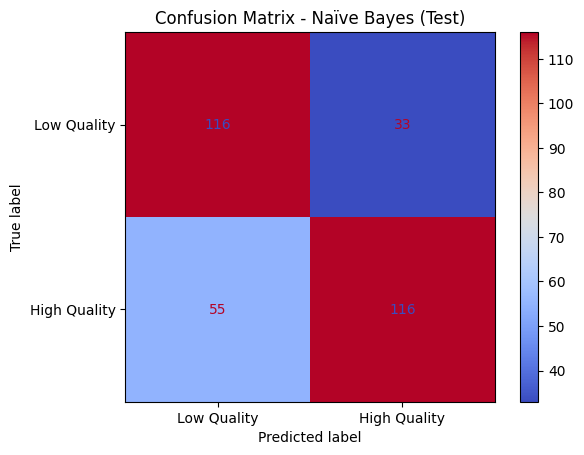

In [8]:
# Display confusion matrices for each model
for model_name, model in zip(["Logistic Regression", "LDA", "QDA", "Naïve Bayes"], [log_reg, lda, qda, nb]):
    # Test data confusion matrix
    y_test_pred = model.predict(X_test)
    display_confusion_matrix(y_test, y_test_pred, model_name, "Test")

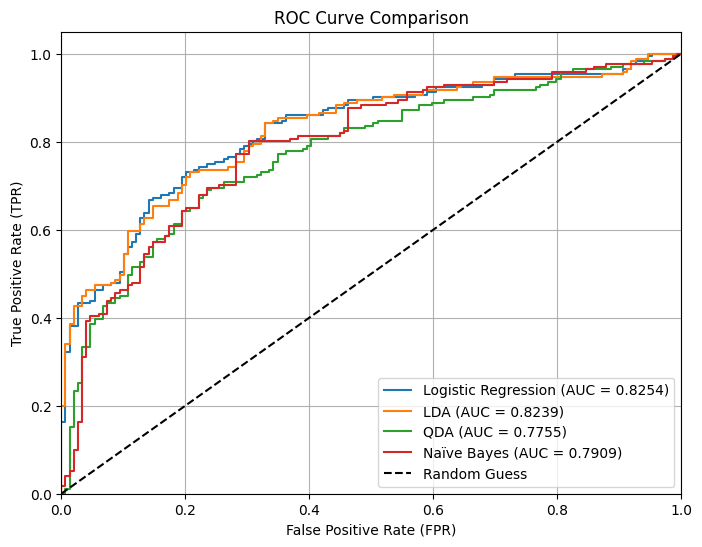

In [9]:
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curve
def plot_roc_curve(models, X_test, y_test):
    plt.figure(figsize=(8, 6))

    for model_name, model in models.items():
        # note for ROC curve we need y_prob as well. 
        y_prob = model.predict_proba(X_test)[:, 1]  # Get probability of positive class
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.4f})")

    # Plot diagonal line for reference
    plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve Comparison")
    plt.legend(loc="lower right")
    plt.grid()

    plt.show()

# Prepare models for ROC curve plotting
models_dict = {
    "Logistic Regression": log_reg,
    "LDA": lda,
    "QDA": qda,
    "Naïve Bayes": nb
}

# Plot ROC curve for all models
plot_roc_curve(models_dict, X_test, y_test)

# Part B : Logistic Regression using Gradient Descent

Import Libraries

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid function

class LogisticRegressionGD:
    def __init__(self, learning_rate=0.01, max_iters=1000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.max_iters = max_iters
        self.tolerance = tolerance
        self.beta = None
        self.loss_history = []
        self.accuracy_history = []

    def sigmoid(self, z):
        return expit(z)

    def compute_loss(self, X, y):
        y_pred = self.sigmoid(X @ self.beta)
        return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

    def compute_accuracy(self, X, y):
        predictions = self.predict(X)
        return np.mean(predictions == y)

    def fit(self, X, y):
        n, p = X.shape
        self.beta = np.zeros(p)
        for _ in range(self.max_iters):
            y_pred = self.sigmoid(X @ self.beta)
            gradient = X.T @ (y_pred - y) / n
            self.beta -= self.learning_rate*gradient
            self.loss_history.append(self.compute_loss(X, y))
            self.accuracy_history.append(self.compute_accuracy(X, y))
            if np.linalg.norm(gradient) < self.tolerance:
                break

    def predict_proba(self, X):
        return self.sigmoid(X @ self.beta)

    def predict(self, X, threshold=0.5):
        return (self.predict_proba(X) >= threshold).astype(int)

    def plot_convergence(self):
        plt.figure(figsize=(8,5))
        plt.plot(self.loss_history, label='Loss', color='red')
        plt.plot(self.accuracy_history, label='Accuracy', color='blue')
        plt.xlabel('Iteration')
        plt.ylabel('Value')
        plt.title('Gradient Descent Convergence')
        plt.legend()
        plt.grid(True)
        plt.show()

In [11]:
# small example

X_example = np.array([[1, 1.0, 2.0], 
                      [1, 2.0, 3.0], 
                      [1, 3.0, 4.0], 
                      [1, 4.0, 5.0]])  # Including bias column
y_example = np.array([0, 0, 1, 1])  # Binary classification labels

coefficients: [-1.11950659  0.91260242 -0.20690417]


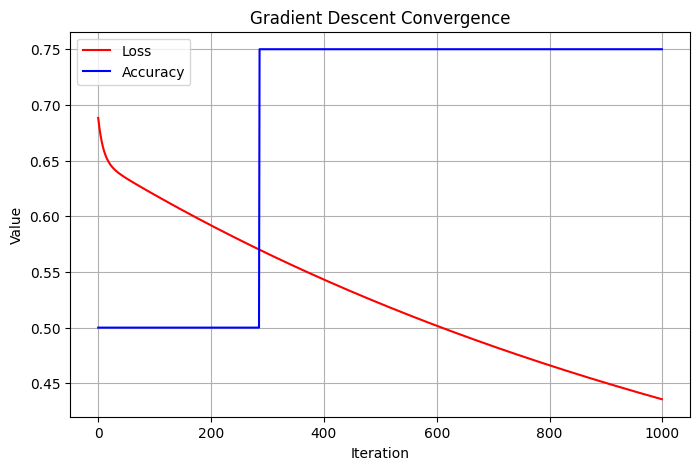

Predictions: [0 1 1 1]
True labels: [0 0 1 1]
Model accuracy: 0.75


In [12]:
# initialize and train

model = LogisticRegressionGD()
model.fit(X_example, y_example)

print(f"coefficients: {model.beta}")



model.plot_convergence()

predictions = model.predict(X_example)
print(f"Predictions: {predictions}")
print(f"True labels: {y_example}")
print(f"Model accuracy: {model.compute_accuracy(X_example, y_example)}")